In [1]:
import os
import rasterio
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
tif_dir = '/media/arturo/T9/Data/shapes/Europa/Italy/DEM/dtm_elev_30m_Italy_v2.tif'
dem = rasterio.open(tif_dir)

In [ ]:
Station_dir = '/media/arturo/T9/Data/Italy/stations/Italy_raingauges/QC_MIX/METADATA/METADATA_INTENSE_OLD.csv'
Station = pd.read_csv(Station_dir)

Station.head(3)

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,...,INTENSE,AGENCY,Source,TimeZon,Elevation,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone
0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,46.811055,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,46.890136,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
2,IT-322_AA_5690_0060_QCv1.csv,IT-322,Alto-Adige,AA_5690,MOLINIDITURES,851.0,32632.0,724491.0,5198298.0,46.900257,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
coords = [(x, y) for x, y in zip(Station['Lon'], Station['Lat'])]

In [5]:
elev = list(dem.sample(coords)) 
elev = [val[0] for val in elev]   

In [6]:
Station['elevation_DEM'] = elev
Station['elevation_DEM'] = Station['elevation_DEM'].where(Station['elevation_DEM'] >= 0, np.nan)

In [7]:
Station['Elevation_update'] = Station['Elevatn'].fillna(Station['elevation_DEM'])

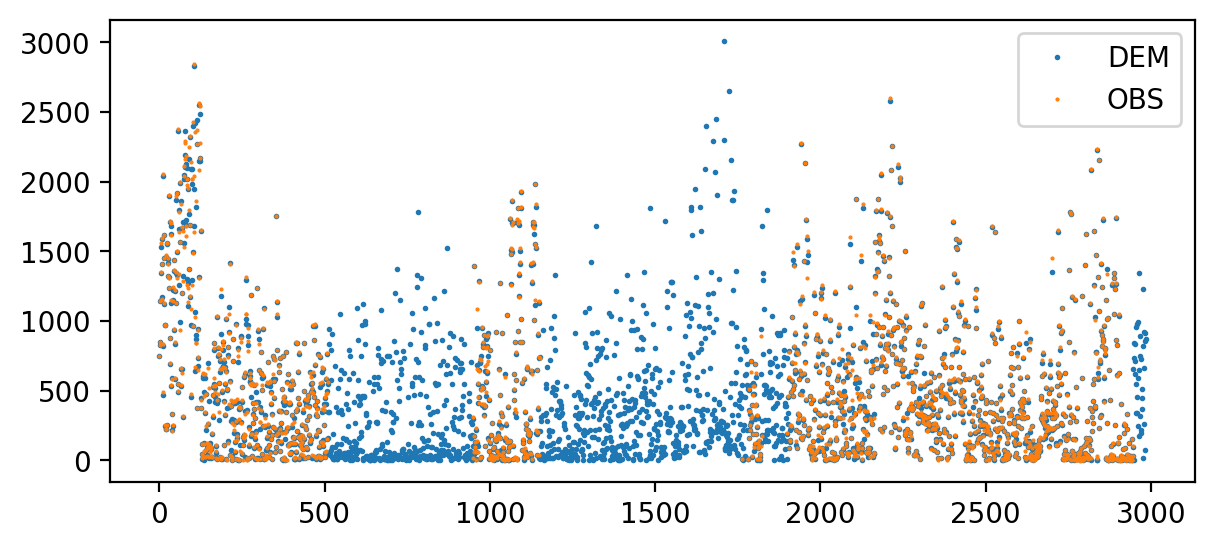

In [8]:
fig = plt.figure(figsize=(7,3),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(Station['elevation_DEM'],'o',markersize=1,label='DEM')
ax1.plot(Station['Elevatn'],'.',markersize=1,label='OBS')
ax1.legend()

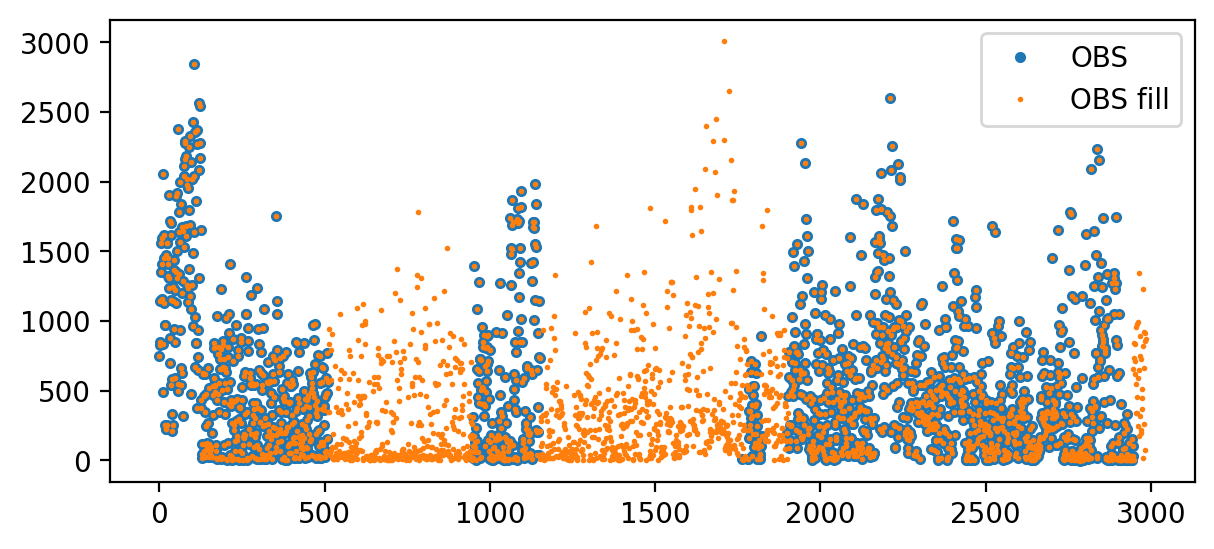

In [17]:
fig = plt.figure(figsize=(7,3),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(Station['Elevatn'],'.',markersize=6,label='OBS')
ax1.plot(Station['Elevation_update'],'o',markersize=1,label='OBS fill')
ax1.legend()

In [18]:
Station = Station.rename(columns={'Elevatn': 'Elevation'})

In [21]:
dir_out = '/media/arturo/T9/Data/Italy/stations/Italy_raingauges/QC_MIX/METADATA/METADATA_INTENSE_UPDATE.csv'
Station.to_csv(dir_out, header=True, index=None)